# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Womenker Karto     [Github](https://github.com/wkarto/article-summarizer)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1:

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [28]:
import requests

url = "https://www.captechu.edu/blog/how-spot-ai-generated-content-it-fact-or-fiction"
response = requests.get(url)
if response.status_code == 200:
    with open("captech_article.html", "w", encoding="utf-8") as f:
        f.write(response.text)
    print("HTML content saved to 'captech_article.html'")
else:
    print(f"Failed to fetch article. Status code: {response.status_code}")


HTML content saved to 'captech_article.html'


## Question 2:

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [29]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup

# Read the HTML file
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()

# Parse HTML and extract text
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Load spaCy and add TextBlob pipe
nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

# Perform sentiment analysis
doc = nlp(text)
polarity = doc._.blob.polarity
num_sentences = len(list(doc.sents))

# Print results
print(f"Polarity Score: {polarity:.3f}")
print(f"Number of Sentences: {num_sentences}")

Polarity Score: 0.107
Number of Sentences: 61


## Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [30]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read the HTML file
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()

# Parse and extract text
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Process text with spaCy
doc = nlp(text)

# Filter tokens: lowercase, alphabetic, non-stopwords
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count frequencies
freq = Counter(tokens).most_common(5)

# Print results one per line
print("Top 5 Most Frequent Tokens (lowercased):")
for word, count in freq:
    print(f"Token: '{word}', Frequency: {count}")


Top 5 Most Frequent Tokens (lowercased):
Token: 'ai', Frequency: 50
Token: 'generated', Frequency: 26
Token: 'capitol', Frequency: 14
Token: 'content', Frequency: 13
Token: 'text', Frequency: 13


## Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [31]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read and parse HTML
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Process text with spaCy
doc = nlp(text)

# Filter and lemmatize: lowercase, alphabetic, non-stop
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count and get top 5
lemma_freq = Counter(lemmas).most_common(5)

# Print results
print("Top 5 Most Frequent Lemmas (lowercased):")
for lemma, count in lemma_freq:
    print(f"Lemma: '{lemma}', Frequency: {count}")


Top 5 Most Frequent Lemmas (lowercased):
Lemma: 'ai', Frequency: 50
Lemma: 'generate', Frequency: 26
Lemma: 'capitol', Frequency: 14
Lemma: 'image', Frequency: 14
Lemma: 'content', Frequency: 13


## Question 5:

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

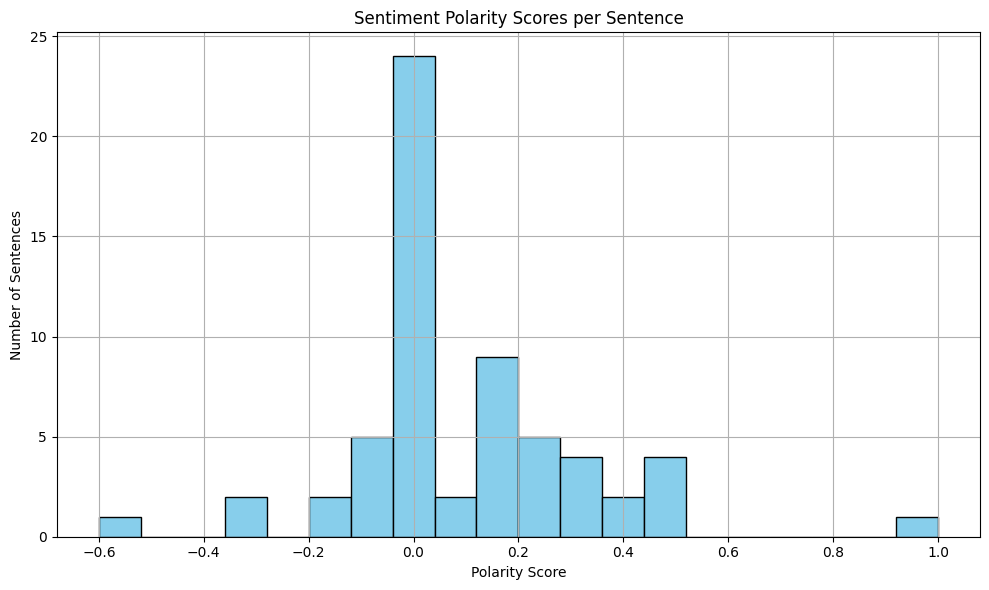

In [32]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load and configure spaCy pipeline
nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

# Read HTML and extract text
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Process full text
doc = nlp(text)

# Get polarity scores for each sentence
sentence_scores = [sent._.blob.polarity for sent in doc.sents]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Sentiment Polarity Scores per Sentence")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

# Most common score range
# Most sentences have a polarity score of exactly 0.0, indicating a **neutral sentiment** is most common in this article.

## Question 6:

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

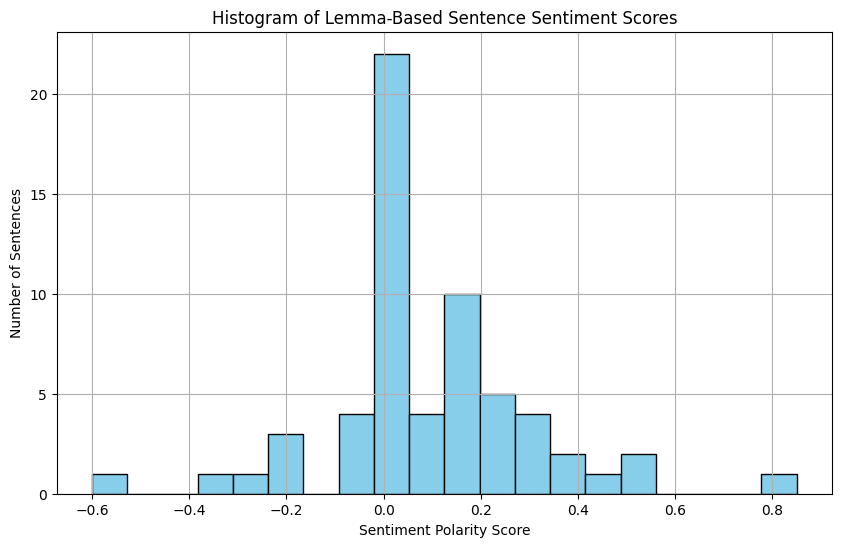

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load spaCy with sentiment component
nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

# Read and extract article text
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Process with spaCy
doc = nlp(text)

# Compute sentence sentiment using lemmas
lemma_scores = []
for sent in doc.sents:
    lemma_text = " ".join([token.lemma_ for token in sent if not token.is_punct])
    lemma_doc = nlp(lemma_text)
    score = lemma_doc._.blob.polarity
    lemma_scores.append(score)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Lemma-Based Sentence Sentiment Scores")
plt.xlabel("Sentiment Polarity Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

# Comment based on histogram:
# Most sentences have a polarity score of exactly 0.0, indicating neutral sentiment is most common even after lemmatization.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?